# Imports

In [6]:
import scipy
from sklearn import preprocessing
import scipy.misc
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
# To show the images inside the book
%matplotlib inline

# Methods to create H5 files for caffe

In [7]:
def createh5file(name, path, extension='jpg'):
    images = getimagesforcaffe(path, extension)
    writeh5file(path, name, images)


def getimagesforcaffe(path, extension):
    image_list = getfilelist(path, extension)
    images = getimages(image_list)
    scaleimages(images)

    images = getsubimagesof(images)
    images = np.array(images)
    images = images.transpose(0, 3, 1, 2)
    print images.shape
    return images


def getfilelist(path, extension):
    return [path + file for file in os.listdir(path) if file.endswith(extension)]


def getimages(imagesnames):
    images = []

    for imagename in imagesnames:
        image = getimage(imagename)
        images.append(image)

    return images


def getimage(path):
    image = scipy.misc.imread(path).astype(float)
    return image


def scaleimages(images):
    for i in range(len(images)):
        images[i] = scaleimage(images[i])


scaler = preprocessing.MinMaxScaler()

def scaleimage(image):
    ascolumns = image.reshape(-1, 3)
    t = scaler.fit_transform(ascolumns)
    transformed = t.reshape(image.shape)

    return transformed


def writeh5file(path, name, images):
    f = h5py.File(path + name + '.h5', 'w', dtype="float")
    f.create_dataset(name, data=images)
    f.close()


def getsubimagesof(images):
    subimages = []

    for image in images:
        currentsubimages = getsubimages(image)
        subimages.extend(currentsubimages)

    return subimages


def getsubimages(image, subimgwidth=30, subimgheight=30, stride=10, cropleft=0, cropright=0, croptop=0, cropbottom=0):
    width = len(image)
    height = len(image[0])
    subimages = []

    i = cropleft

    while i < width - cropright:
        startwidth = i
        endwidth = startwidth + subimgwidth
        if endwidth > width - cropright:
            startwidth = width - 1 - subimgwidth
            endwidth = width - 1
        j = croptop
        while j < height - cropbottom:
            startheight = j
            endheight = startheight + subimgheight

            if endheight > height - cropbottom:
                startheight = height - 1 - subimgheight
                endheight = height - 1

            currentimage = image[startwidth:endwidth, startheight:endheight]
            subimages.append(currentimage)

            j = startheight + stride + 1
            if endheight == height - 1:
                break

        i = startwidth + stride + 1
        if endwidth == width - 1:
            break

    return subimages

# Method to show H5 images

In [8]:
def showh5images(h5filepath, datasetname, imagestoshow=20):
    with h5py.File(h5filepath, "r") as f:
        for blob in f:
            print blob
        dataset = np.array(f[datasetname])

    print dataset.shape
    
    if len(dataset) < imagestoshow:
        imagestoshow = len(dataset)
    
    for i in range(imagestoshow):
        print 'image: ' + str(i)
        swap = np.swapaxes(np.swapaxes(dataset[i],0,1), 1,2)        
        print plt.imshow(swap)
        plt.show()

# Usage example

(59946L, 3L, 30L, 30L)
test
(59946L, 3L, 30L, 30L)
image: 0
AxesImage(60,40;372x248)


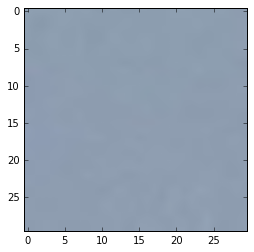

image: 1
AxesImage(60,40;372x248)


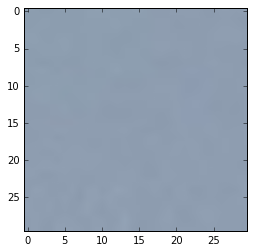

image: 2
AxesImage(60,40;372x248)


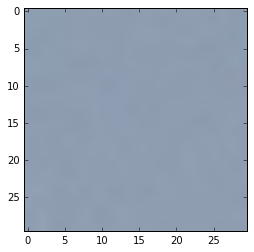

image: 3
AxesImage(60,40;372x248)


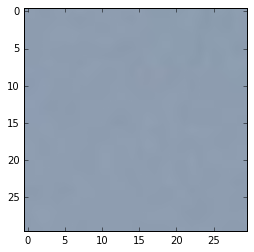

image: 4
AxesImage(60,40;372x248)


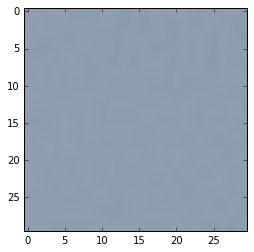

image: 5
AxesImage(60,40;372x248)


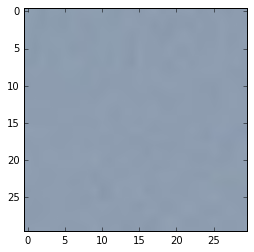

image: 6
AxesImage(60,40;372x248)


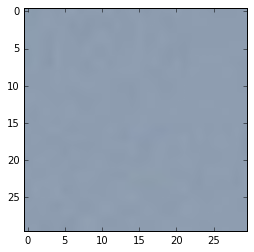

image: 7
AxesImage(60,40;372x248)


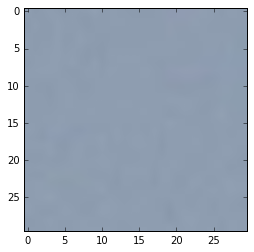

image: 8
AxesImage(60,40;372x248)


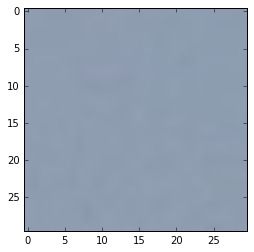

image: 9
AxesImage(60,40;372x248)


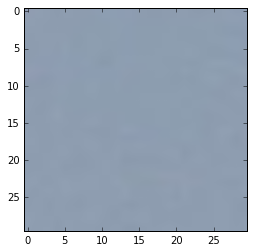

image: 10
AxesImage(60,40;372x248)


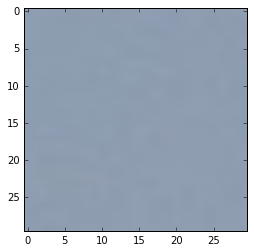

image: 11
AxesImage(60,40;372x248)


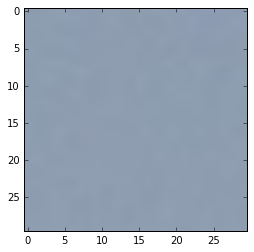

image: 12
AxesImage(60,40;372x248)


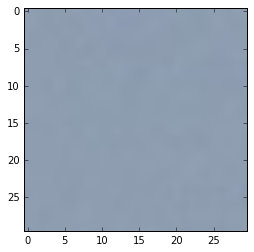

image: 13
AxesImage(60,40;372x248)


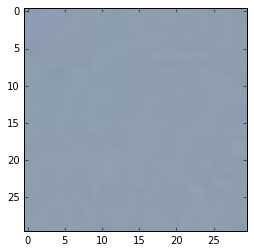

image: 14
AxesImage(60,40;372x248)


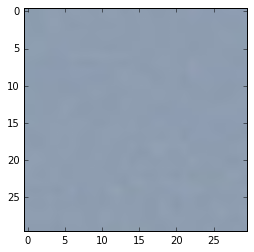

image: 15
AxesImage(60,40;372x248)


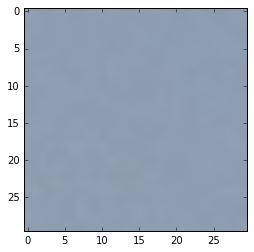

image: 16
AxesImage(60,40;372x248)


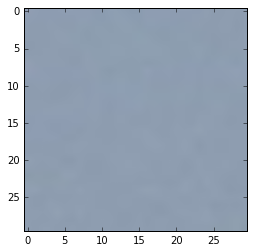

image: 17
AxesImage(60,40;372x248)


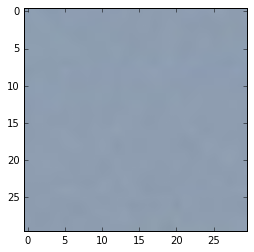

image: 18
AxesImage(60,40;372x248)


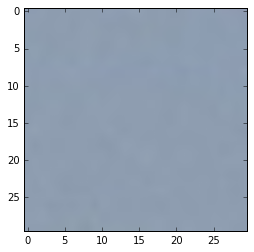

image: 19
AxesImage(60,40;372x248)


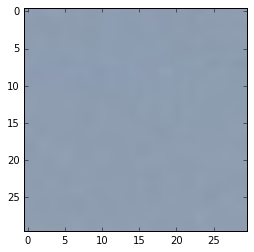

In [10]:
createh5file('test', 'images/')

showh5images('images/test.h5', 'test')